In [1]:
!pip install pandas numpy matplotlib seaborn folium geopy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time
import folium


C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\4259483292.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [3]:
import sys
!{sys.executable} -m pip install folium


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\soumi\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
import folium
print(folium.__version__)

0.19.5


In [5]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from geopy.geocoders import Nominatim


In [7]:
import sys
!{sys.executable} -m pip install geopy



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\soumi\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [8]:
import geopy
print(geopy.__version__)


2.4.1


In [9]:
# Load the datasets
zomato_data = pd.read_csv('zomato_data.csv')
geo_data = pd.read_csv('Geographical Coordinates.csv')

# Initial exploration
print("Zomato data shape:", zomato_data.shape)
zomato_data.head()

print("\nGeographical data shape:", geo_data.shape)
geo_data.head()

# Check for missing values and data types
zomato_data.info()
zomato_data.isnull().sum()

Zomato data shape: (51717, 10)

Geographical data shape: (26, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [10]:
# Create a copy of the original data
data1_cleaned = zomato_data.copy()

# Step 1: Clean the rating column
data1_cleaned['rate'] = data1_cleaned['rate'].replace('-', np.nan)
data1_cleaned['rate'] = data1_cleaned['rate'].str.replace('/5', '') if isinstance(data1_cleaned['rate'], pd.Series) else data1_cleaned['rate']
data1_cleaned['rate'] = pd.to_numeric(data1_cleaned['rate'], errors='coerce')
median_rating = data1_cleaned['rate'].median()
data1_cleaned['rate'].fillna(median_rating, inplace=True)


C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\842252564.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1_cleaned['rate'].fillna(median_rating, inplace=True)


In [11]:
# Step 2: Clean the cost column
data1_cleaned['approx_costfor_two_people'] = data1_cleaned['approx_costfor_two_people'].astype(str).str.replace(',', '')
data1_cleaned['approx_costfor_two_people'] = pd.to_numeric(data1_cleaned['approx_costfor_two_people'], errors='coerce')
median_cost = data1_cleaned['approx_costfor_two_people'].median()
data1_cleaned['approx_costfor_two_people'].fillna(median_cost, inplace=True)

C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\4022135788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1_cleaned['approx_costfor_two_people'].fillna(median_cost, inplace=True)


In [12]:
# Step 3: Handle categorical columns
data1_cleaned['dish_liked'].fillna('Not Available', inplace=True)
data1_cleaned['cuisines'].fillna('Other', inplace=True)
data1_cleaned['rest_type'].fillna('Unknown', inplace=True)

C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\3098087836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1_cleaned['dish_liked'].fillna('Not Available', inplace=True)
C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\3098087836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [13]:
# Step 4: Handle votes column
median_votes = data1_cleaned['votes'].median()
data1_cleaned['votes'].fillna(median_votes, inplace=True)

C:\Users\soumi\AppData\Local\Temp\ipykernel_13440\1007692026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1_cleaned['votes'].fillna(median_votes, inplace=True)


In [14]:
# Step 5: Binary encoding
data1_cleaned['online_order'] = data1_cleaned['online_order'].map({'Yes': 1, 'No': 0})
data1_cleaned['book_table'] = data1_cleaned['book_table'].map({'Yes': 1, 'No': 0})


In [15]:
# Step 6: Data type conversion
data1_cleaned['rate'] = data1_cleaned['rate'].astype(float)
data1_cleaned['votes'] = data1_cleaned['votes'].astype(int)
data1_cleaned['approx_costfor_two_people'] = data1_cleaned['approx_costfor_two_people'].astype(int)

In [16]:
# Verify the changes
print("After cleaning:")
data1_cleaned.info()
data1_cleaned.isnull().sum()

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int64  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.9+ MB


online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

In [17]:
# Merge datasets for geographical analysis
merged_df = pd.merge(data1_cleaned, geo_data, on='listed_incity', how='left')

# Check the merged dataset
print("Merged data shape:", merged_df.shape)
merged_df.head()

# Check for missing latitude/longitude values after merging
merged_df[merged_df['Latitude'].isnull()].groupby('listed_incity').size()

Merged data shape: (51717, 12)


listed_incity
Rajajinagar       1079
Residency Road    1620
Sarjapur Road     1261
Whitefield        1620
dtype: int64

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


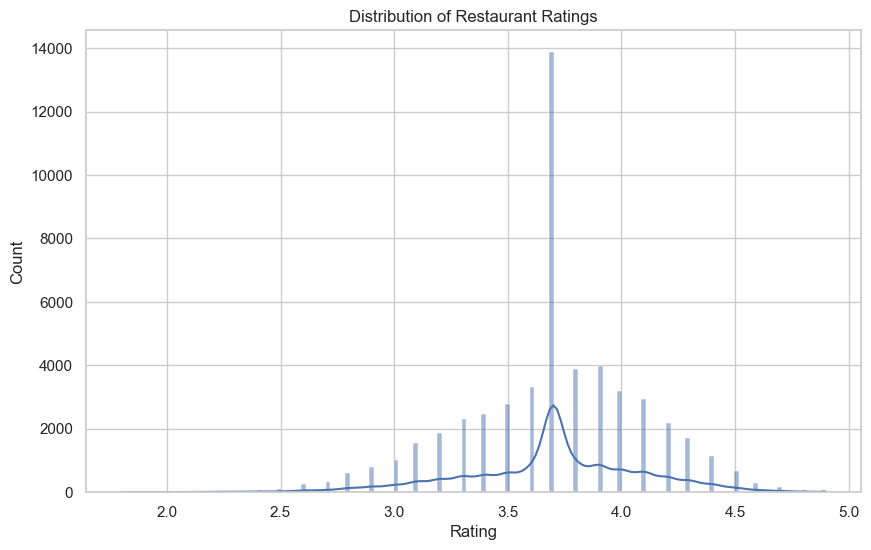

In [18]:
print("Available styles:", plt.style.available)
plt.style.use('default')
sns.set(style="whitegrid")  

# 1. Distribution of restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data1_cleaned, x='rate', kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

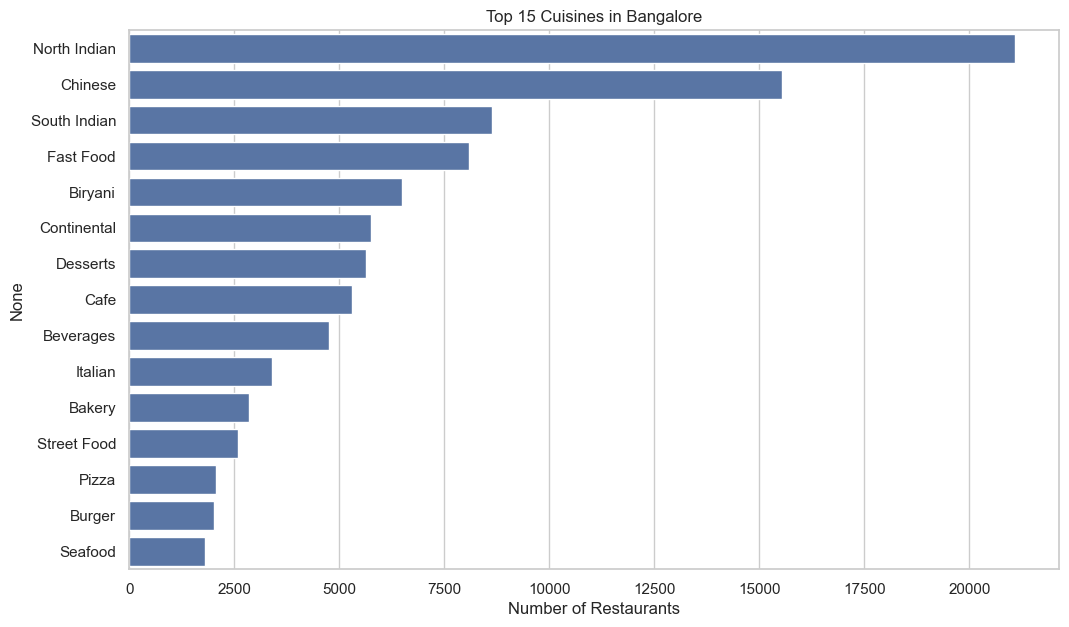

In [19]:
# 2. Top cuisines in Bangalore
all_cuisines = []
for cuisines in data1_cleaned['cuisines'].dropna():
    if isinstance(cuisines, str):
        all_cuisines.extend([cuisine.strip() for cuisine in cuisines.split(',')])

cuisine_counts = pd.Series(all_cuisines).value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 15 Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.show()

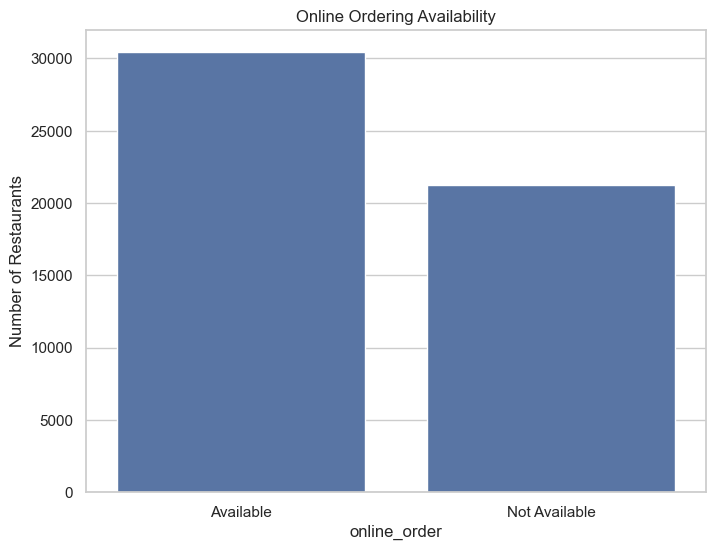

In [20]:
# 3. Online ordering availability
plt.figure(figsize=(8, 6))
online_order_counts = data1_cleaned['online_order'].value_counts()
sns.barplot(x=online_order_counts.index.map({1: 'Available', 0: 'Not Available'}), y=online_order_counts.values)
plt.title('Online Ordering Availability')
plt.ylabel('Number of Restaurants')
plt.show()

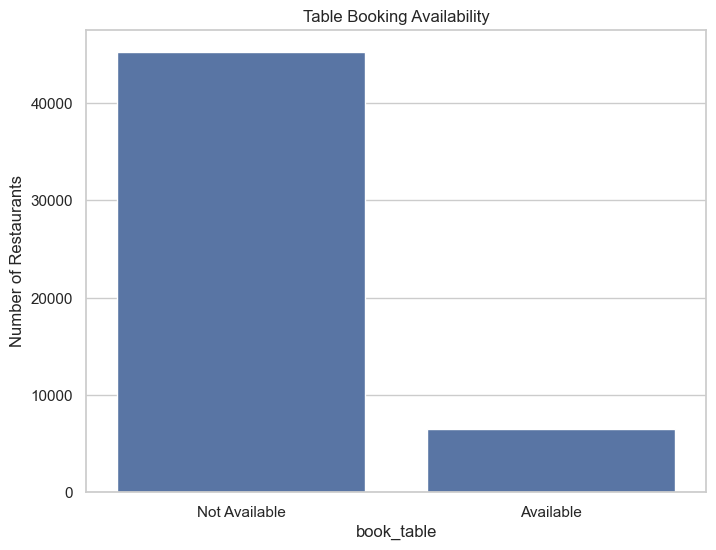

In [21]:
# 4. Table booking availability
plt.figure(figsize=(8, 6))
book_table_counts = data1_cleaned['book_table'].value_counts()
sns.barplot(x=book_table_counts.index.map({1: 'Available', 0: 'Not Available'}), y=book_table_counts.values)
plt.title('Table Booking Availability')
plt.ylabel('Number of Restaurants')
plt.show()

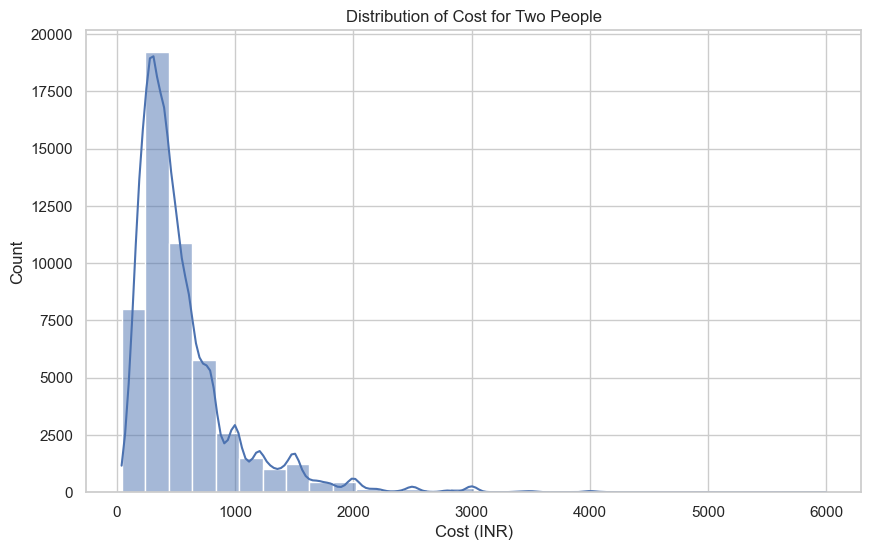

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data1_cleaned, x='approx_costfor_two_people', bins=30, kde=True)
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost (INR)')
plt.ylabel('Count')
plt.show()

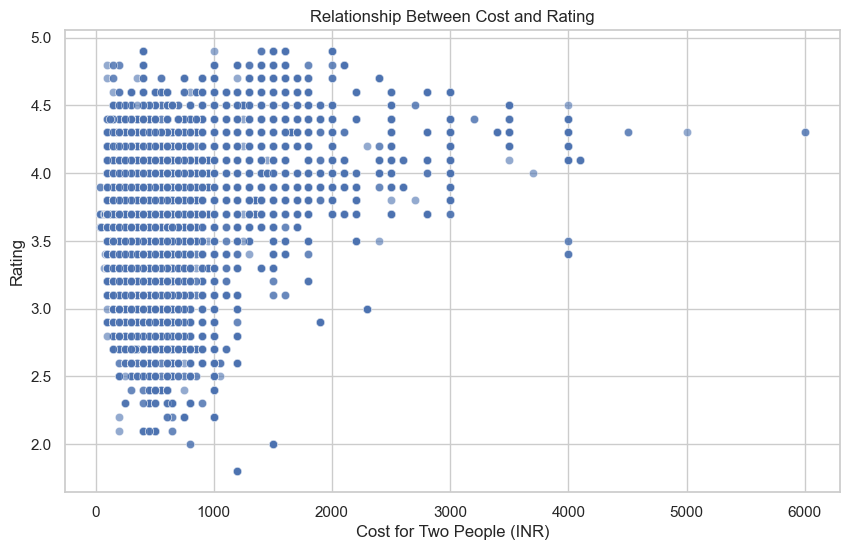

In [23]:
# 6. Relationship between cost and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1_cleaned, x='approx_costfor_two_people', y='rate', alpha=0.6)
plt.title('Relationship Between Cost and Rating')
plt.xlabel('Cost for Two People (INR)')
plt.ylabel('Rating')
plt.show()

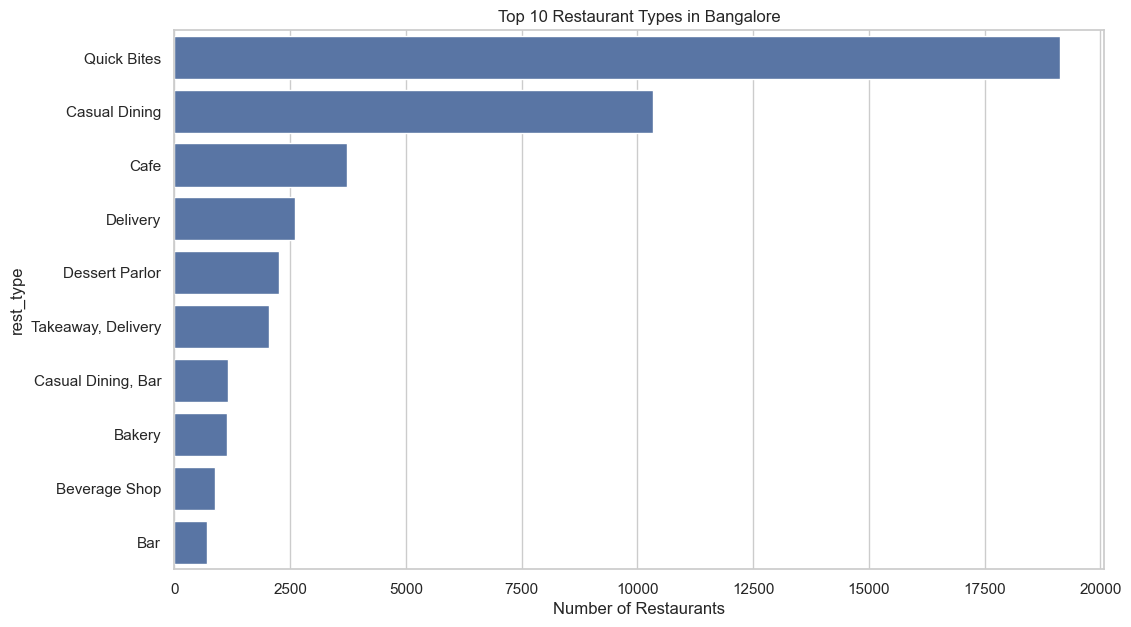

In [24]:
# 7. Restaurant types distribution
rest_type_counts = data1_cleaned['rest_type'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=rest_type_counts.values, y=rest_type_counts.index)
plt.title('Top 10 Restaurant Types in Bangalore')
plt.xlabel('Number of Restaurants')
plt.show()

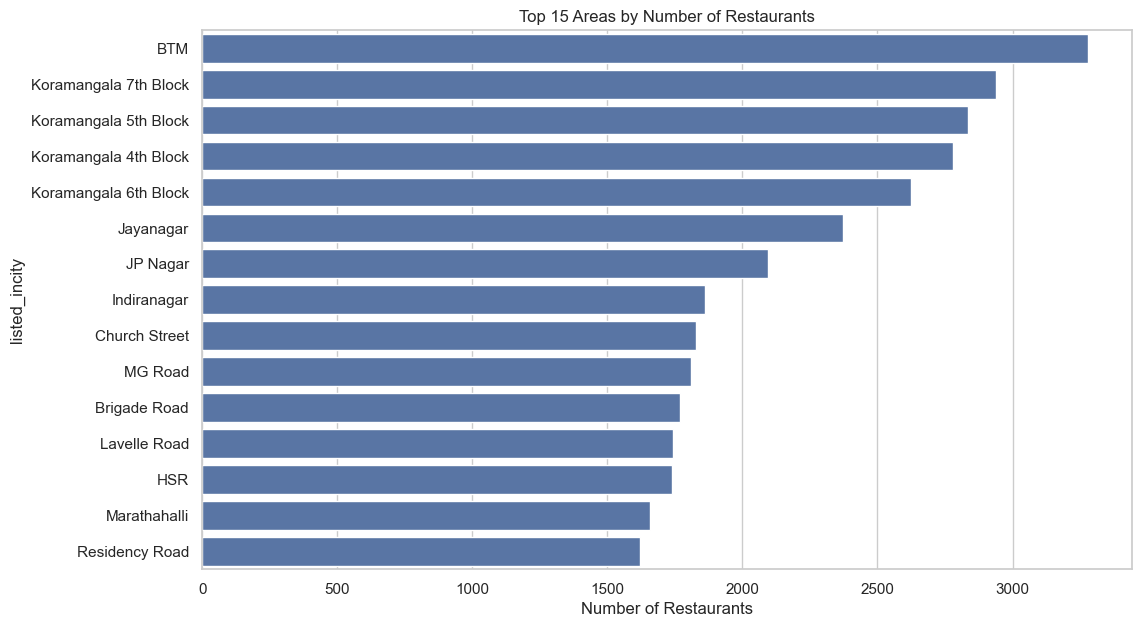

In [25]:
# 8. Area-wise restaurant count
area_counts = data1_cleaned['listed_incity'].value_counts().head(15)
plt.figure(figsize=(12, 7))
sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title('Top 15 Areas by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.show()

In [26]:
# Create a base map of Bangalore
bangalore_coords = [12.9716, 77.5946]  
bangalore_map = folium.Map(location=bangalore_coords, zoom_start=12)



In [27]:
# 1. Restaurant Density Map
location_counts = merged_df.groupby(['listed_incity', 'Latitude', 'Longitude']).size().reset_index(name='count')

# Create a density map
for _, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['count']/5,  
        popup=f"{row['listed_incity']}: {row['count']} restaurants",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(bangalore_map)

# Save the map
bangalore_map.save('restaurant_density_map.html')


In [28]:
# 2. Cuisine-Specific Map (Italian Restaurants)
italian_restaurants = merged_df[merged_df['cuisines'].str.contains('Italian', case=False, na=False)]

# Create a map for Italian restaurants
italian_map = folium.Map(location=bangalore_coords, zoom_start=12)

for _, row in italian_restaurants.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Name: {row.get('name', 'Unknown')}<br>"
                  f"Rating: {row['rate']}<br>"
                  f"Cost: ₹{row['approx_costfor_two_people']} for two<br>"
                  f"Area: {row['listed_incity']}",
            icon=folium.Icon(color='red', icon='cutlery', prefix='fa')
        ).add_to(italian_map)

italian_map.save('italian_restaurants_map.html')

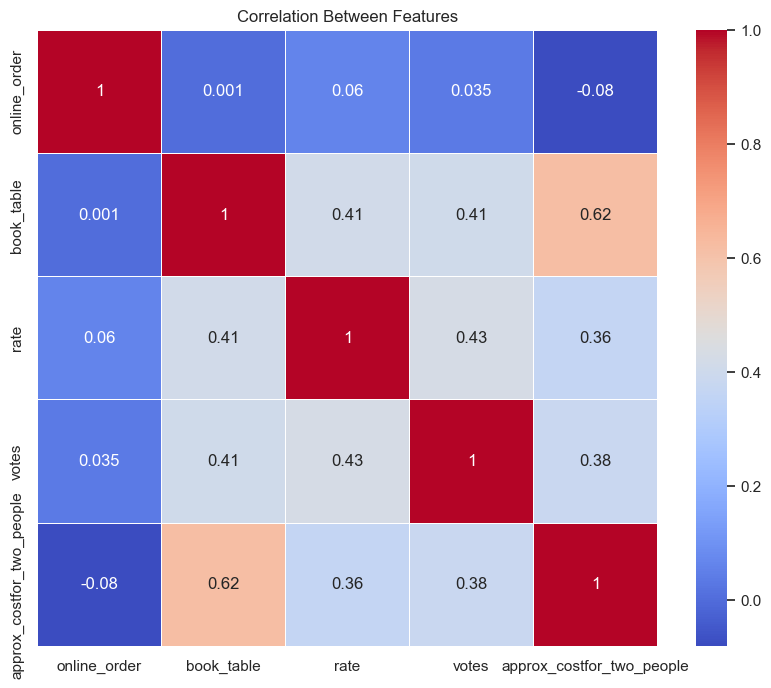

In [29]:
# 1. Correlation between features
numeric_columns = ['online_order', 'book_table', 'rate', 'votes', 'approx_costfor_two_people']
correlation = data1_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()


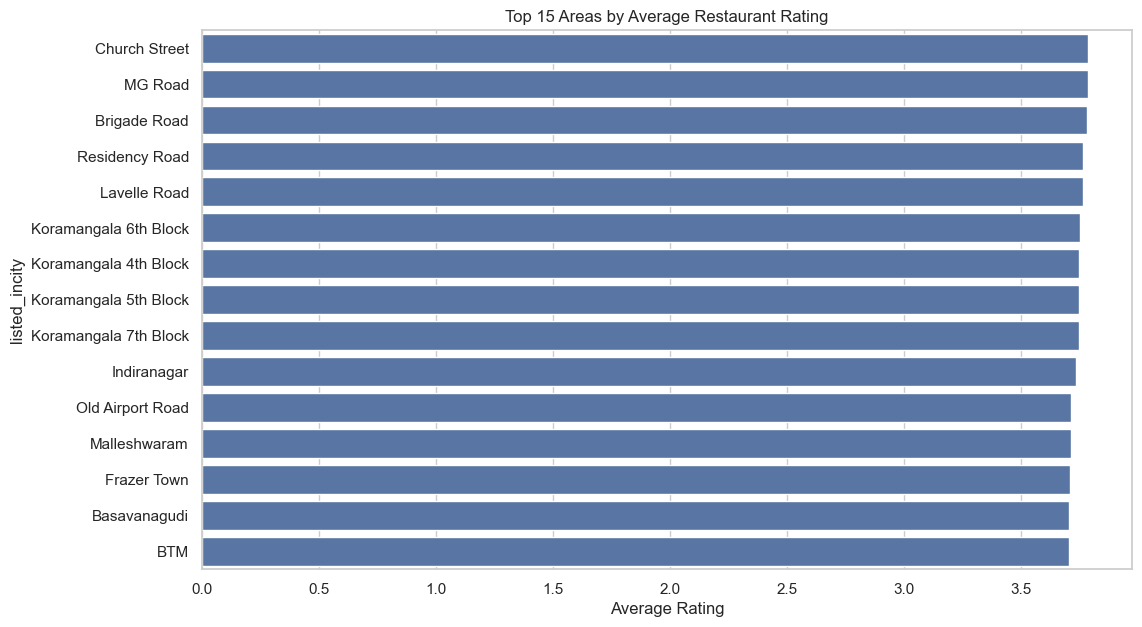

In [30]:
# 2. Average ratings by area
area_ratings = merged_df.groupby('listed_incity')['rate'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 7))
sns.barplot(x=area_ratings.values, y=area_ratings.index)
plt.title('Top 15 Areas by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.show()

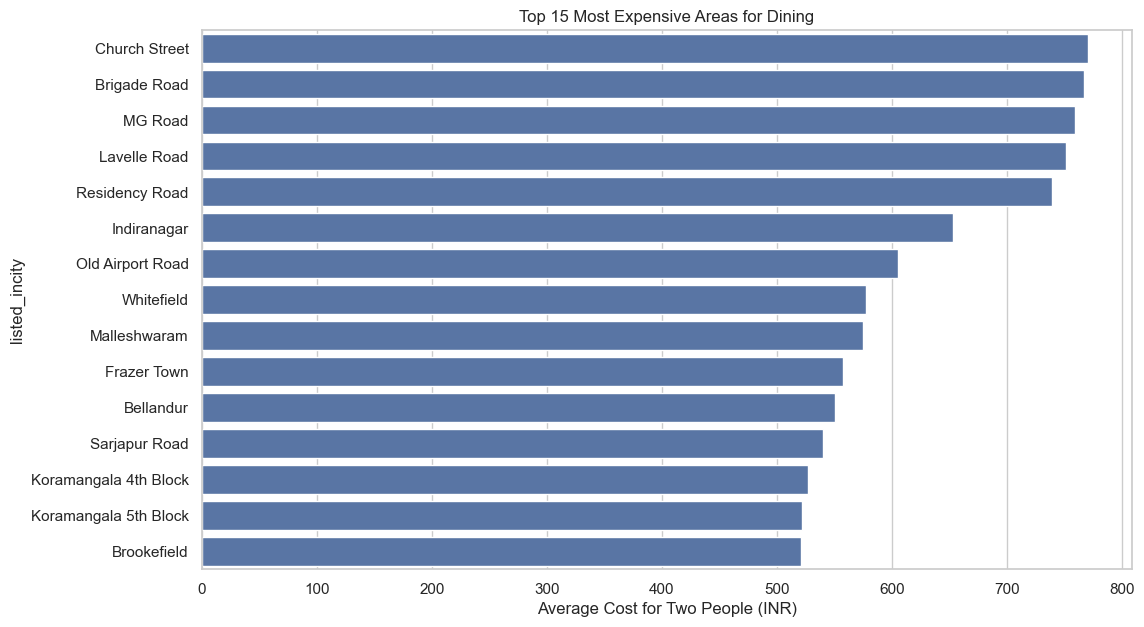

In [31]:
# 3. Cost analysis by area
area_costs = merged_df.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 7))
sns.barplot(x=area_costs.values, y=area_costs.index)
plt.title('Top 15 Most Expensive Areas for Dining')
plt.xlabel('Average Cost for Two People (INR)')
plt.show()

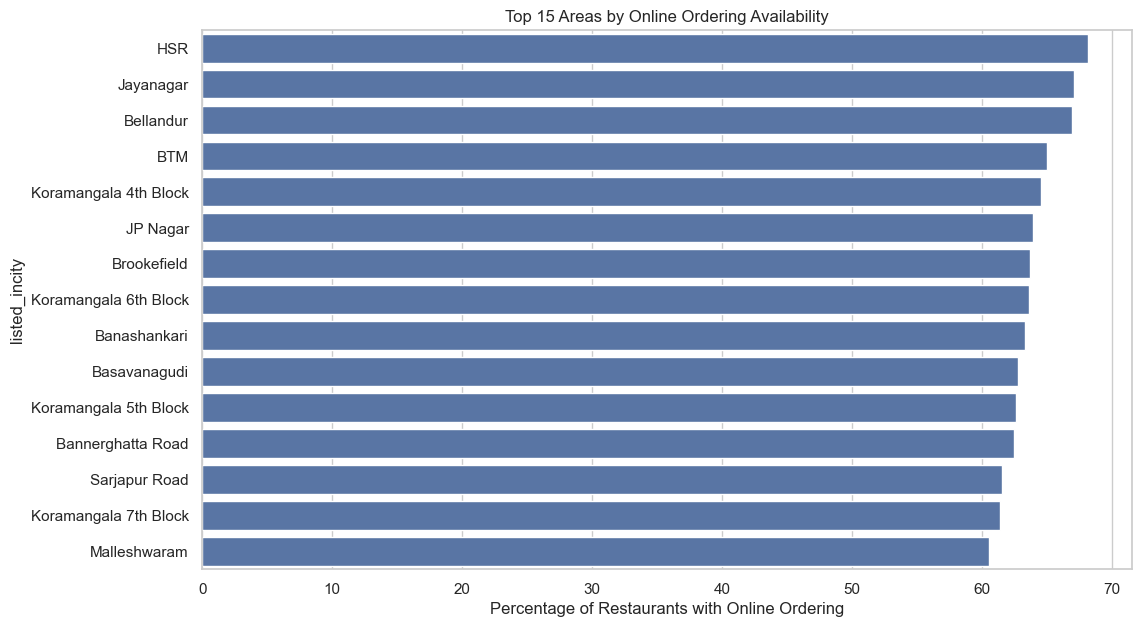

In [32]:
# 4. Online ordering availability by area
online_by_area = merged_df.groupby('listed_incity')['online_order'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 7))
sns.barplot(x=online_by_area.values * 100, y=online_by_area.index)
plt.title('Top 15 Areas by Online Ordering Availability')
plt.xlabel('Percentage of Restaurants with Online Ordering')
plt.show()

In [33]:
bangalore_map

In [34]:
italian_map

In [70]:
# 1. Checking the shape of the given dataset (number of rows and columns).
df = pd.read_csv("zomato_data.csv")
print(f"Dataset shape: {df.shape}")


Dataset shape: (51717, 10)


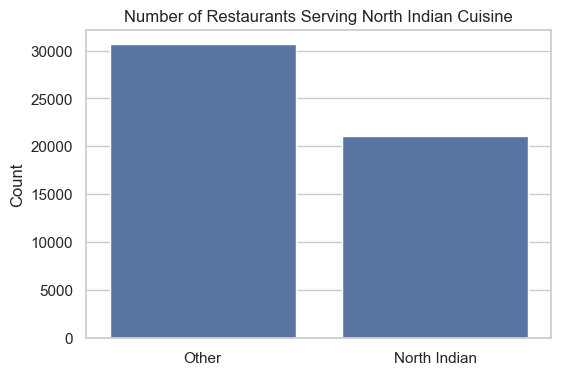

In [71]:
# 2. Finding how many restaurants serve North Indian cuisine.
north_indian = df[df['cuisines'].str.contains('North Indian', na=False)]
plt.figure(figsize=(6,4))
sns.barplot(x=["Other", "North Indian"], y=[len(df) - len(north_indian), len(north_indian)])
plt.title("Number of Restaurants Serving North Indian Cuisine")
plt.ylabel("Count")
plt.show()


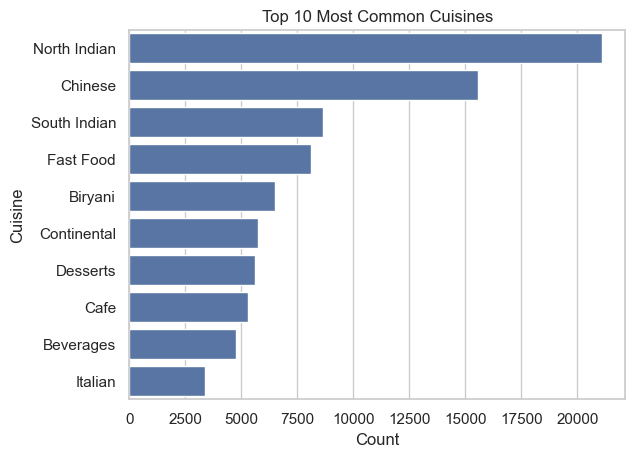

In [72]:
# 3. Determining the most common cuisine offered by restaurants in Bangalore.
from collections import Counter
cuisine_list = df['cuisines'].dropna().str.split(', ')
flat_cuisine = [item for sublist in cuisine_list for item in sublist]
top_cuisines = Counter(flat_cuisine).most_common(10)

cuisine_df = pd.DataFrame(top_cuisines, columns=["Cuisine", "Count"])
sns.barplot(x="Count", y="Cuisine", data=cuisine_df)
plt.title("Top 10 Most Common Cuisines")
plt.show()


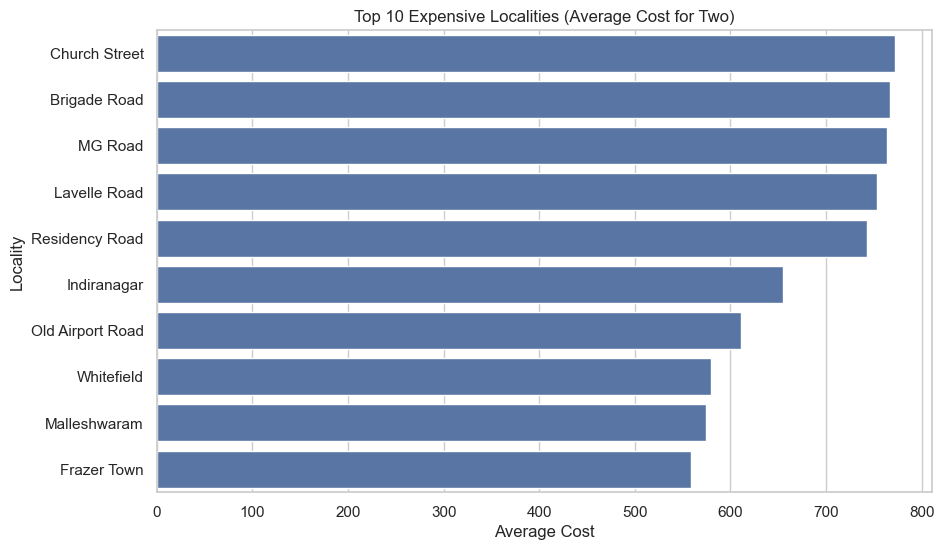

In [38]:
df_cost = df.copy()
df_cost['approx_costfor_two_people'] = pd.to_numeric(df_cost['approx_costfor_two_people'].str.replace(',', ''), errors='coerce')

avg_cost = df_cost.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost.values, y=avg_cost.index)
plt.title("Top 10 Expensive Localities (Average Cost for Two)")
plt.xlabel("Average Cost")
plt.ylabel("Locality")
plt.show()


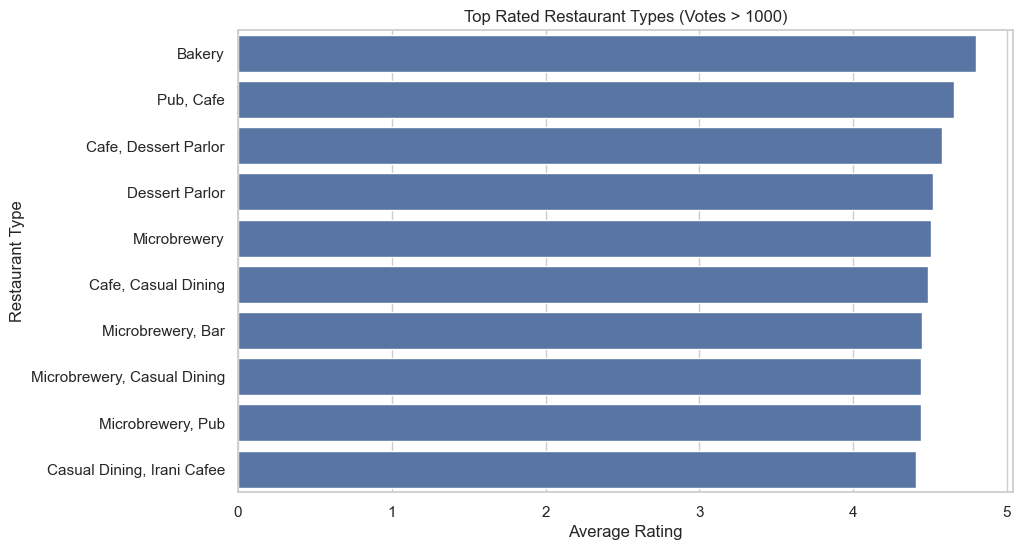

In [73]:
# 5. Finding the restaurant type with the top rating (over 1000 votes).
df_votes = df[df['votes'] > 1000].copy()
df_votes['rate_clean'] = pd.to_numeric(df_votes['rate'].str.extract(r'(\d\.\d)').iloc[:, 0], errors='coerce')
top_rated = df_votes.groupby('rest_type')['rate_clean'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_rated.values, y=top_rated.index)
plt.title("Top Rated Restaurant Types (Votes > 1000)")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Type")
plt.show()


In [74]:
# 6. Identifying the minimum cost to eat out in Bangalore.
df['approx_costfor_two_people'] = pd.to_numeric(
    df['approx_costfor_two_people'].astype(str).str.replace(',', ''), errors='coerce'
)

filtered_cost = df[(df['approx_costfor_two_people'] >= 100) & 
                   (df['approx_costfor_two_people'] <= 5000)]
min_cost = filtered_cost['approx_costfor_two_people'].min()

print(f"Realistic minimum cost to eat out in Bangalore: ₹{int(min_cost)}")



Realistic minimum cost to eat out in Bangalore: ₹100


In [76]:
# 8. Identifying the locality with the most restaurants with over 500 votes and a rating below 3.0.
df['rate_clean'] = pd.to_numeric(df['rate'].str.extract(r'(\d\.\d)').iloc[:, 0], errors='coerce')
low_rated_popular = df[(df['votes'] > 500) & (df['rate_clean'] < 3.0)]
area_counts = low_rated_popular['listed_incity'].value_counts()

print("Locality with most low-rated, high-vote restaurants:")
print(area_counts.head(1))


Locality with most low-rated, high-vote restaurants:
listed_incity
Brookefield    8
Name: count, dtype: int64


In [51]:
# 9. Determining which locality in Bangalore Zomato should target for expansion based on restaurant type diversity.
diversity = df.groupby('listed_incity')['rest_type'].nunique().sort_values(ascending=False)
print("Most diverse locality (restaurant types):")
print(diversity.head(1))


✅ Most diverse locality (restaurant types):
listed_incity
BTM    61
Name: rest_type, dtype: int64


In [77]:
# 10. Calculating the average cost difference between buffet and delivery restaurants.
buffet = df[df['listed_intype'].str.contains('Buffet', na=False)]
delivery = df[df['listed_intype'].str.contains('Delivery', na=False)]

buffet_avg = buffet['approx_costfor_two_people'].mean()
delivery_avg = delivery['approx_costfor_two_people'].mean()
difference = buffet_avg - delivery_avg

print(f"Buffet Avg: ₹{int(buffet_avg)}")
print(f" Delivery Avg: ₹{int(delivery_avg)}")
print(f"Cost Difference: ₹{int(difference)}")


Buffet Avg: ₹1306
 Delivery Avg: ₹464
Cost Difference: ₹842


In [78]:
# 11. Finding the maximum number of votes received by any restaurant with online ordering.
max_votes_online = df[df['online_order'] == 'Yes']['votes'].max()
print(f"Max votes (online order): {max_votes_online}")


Max votes (online order): 16832


In [55]:
# 12. Calculating the average rating of restaurants serving both North Indian and Chinese cuisines.
ni_chinese = df[df['cuisines'].str.contains("North Indian", na=False) & 
                df['cuisines'].str.contains("Chinese", na=False)].copy()
ni_chinese.loc[:, 'rate_clean'] = pd.to_numeric(ni_chinese['rate'].str.extract(r'(\d\.\d)').iloc[:, 0], errors='coerce')
avg_rating = ni_chinese['rate_clean'].mean()
print(f" Average Rating (North Indian + Chinese): {avg_rating:.2f}")



✅ Average Rating (North Indian + Chinese): 3.57


In [79]:
# 13. Estimating the most profitable area for Zomato based on potential revenue estimation (strike rate calculation).
df['revenue_proxy'] = df['votes'] * df['approx_costfor_two_people']
revenue = df.groupby('listed_incity')['revenue_proxy'].sum().sort_values(ascending=False)

print("Most profitable area:")
print(revenue.head(1))

Most profitable area:
listed_incity
Koramangala 7th Block    1.001584e+09
Name: revenue_proxy, dtype: float64


In [80]:
# 14. Identifying which restaurant type Zomato should focus on to reduce customer complaints.
df['rate_clean'] = pd.to_numeric(df['rate'].str.extract(r'(\d\.\d)').iloc[:, 0], errors='coerce')
filtered_df = df[df['votes'] > 100]
type_ratings = filtered_df.groupby('rest_type')['rate_clean'].mean().sort_values()
options = [
    "Bakery, Beverage Shop",
    "Sweet Shop, Quick Bites",
    "Quick Bites",
    "Fine Dining"
]

print("Average Ratings for Given Options:\n")
for opt in options:
    if opt in type_ratings.index:
        print(f"{opt}: {type_ratings[opt]:.2f}")
    else:
        matches = [t for t in type_ratings.index if opt in t]
        if matches:
            print(f"{opt} (matched as '{matches[0]}'): {type_ratings[matches[0]]:.2f}")
        else:
            print(f"{opt}: Not found in dataset")

print("\nLowest rated restaurant types overall:")
print(type_ratings.head(10))


Average Ratings for Given Options:

Bakery, Beverage Shop: Not found in dataset
Sweet Shop, Quick Bites: 3.87
Quick Bites: 3.78
Fine Dining: 4.23

Lowest rated restaurant types overall:
rest_type
Takeaway                       3.425000
Bakery, Quick Bites            3.520513
Quick Bites, Food Court        3.666667
Quick Bites, Dessert Parlor    3.678049
Food Truck                     3.700000
Lounge, Microbrewery           3.750000
Quick Bites                    3.780805
Takeaway, Delivery             3.780833
Food Court, Quick Bites        3.804000
Food Court                     3.818333
Name: rate_clean, dtype: float64


In [81]:
# 15. Determining the area where Zomato should invest, based on high ratings, high number of votes, and online orders.
filtered = df[(df['rate_clean'] > 4.2) & (df['votes'] > 500) & (df['online_order'] == 'Yes')]
area_counts = filtered['listed_incity'].value_counts()

print("Best investment area:")
print(area_counts.head(1))

Best investment area:
listed_incity
MG Road    97
Name: count, dtype: int64
